# ÁRBOLES DE CLASIFICACIÓN

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Total datos entrenamiento
data = pd.read_excel('./Datos_Train.xlsx')
# Conjunto train 80%
#data_train = pd.read_excel('./Datos_Train80.xlsx')
# Conjunto evaluación 20%
#data_val = pd.read_excel('./Datos_Val20.xlsx')

In [3]:
data.dtypes

sid                              int64
hour                             int64
termicSensation_origin         float64
termicSensation_destination    float64
transport_mode                   int64
distance                         int64
price                            int64
eta                              int64
min_distance                     int64
min_price                        int64
min_eta                          int64
binaryTarget                     int64
weekday_number                   int64
hora_punta                       int64
llovizna                         int64
dtype: object

### Convertir variables dummie

El algoritmo utilizado trata a todas las variables como continuas. En el caso de variables categóricas binarias esto no es un problema, sin embargo, para variables con más de dos categorías sí. Para solucionar este problema convertimos la variable 'tranport_mode' a sus correspondientes variables dummies

In [4]:
data.shape

(348218, 15)

In [5]:
trans_dummies = pd.get_dummies(data['transport_mode'], prefix='trans')

In [6]:
trans_dummies.shape

(348218, 11)

In [7]:
data = data.merge(trans_dummies,left_index=True, right_index=True)

In [8]:
data.isna().values.any()

False

### Hacer partición Train y Test

In [9]:
porcentaje_train = 0.80 
data["is_train"] = np.random.uniform(0,1, len(data))<=0.80

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

### Quedarnos variables predictoras y target

In [11]:
colnames = data.columns.values.tolist()
predictors = ['hour','termicSensation_origin','termicSensation_destination','distance',\
              'price','eta','min_distance','min_price','min_eta','weekday_number','hora_punta','llovizna',\
              'trans_1','trans_2','trans_3','trans_4','trans_5','trans_6','trans_7','trans_8','trans_9',\
              'trans_10','trans_11']
target = ['binaryTarget']

In [12]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

#class_weight = None (No balancea clases)
#criterion = "entropy" (Criterio)
#max_features = auto -> Cantidad de características a buscar para la mejor división: sqrt(n_features) #Evitar overfitting
#max_depth = 10 -> Profundidad máxima (Evitar overfitting)
#min_samples_split -> mínimo número observaciones para dividir nodo
#min_samples_leaf -> mínimo número hojas por nodo 

In [13]:
tree = DecisionTreeClassifier(class_weight=None, criterion="entropy", max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split=100, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [14]:
preds = tree.predict(test[predictors]) #Predicciones en tabla validación

In [15]:
true_labels = test[target].values.flatten() #Verdaderos valores Tabla validación

In [16]:
pd.crosstab(true_labels, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,0,1
Actual,,
0,51315,3272
1,9174,5793


### Accuracy

In [17]:
sklearn.metrics.accuracy_score(true_labels, preds, normalize=True, sample_weight=None)

0.8210598959082152

## Visualización del árbol de decisión

Hacer uno con menos profundidad para poner la imagen

In [35]:
tree_img = DecisionTreeClassifier(class_weight=None, criterion="entropy", max_depth = 3, max_features = 'auto', min_samples_leaf = 1, min_samples_split=100, random_state=99)
tree_img.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [36]:
from sklearn.tree import export_graphviz

In [37]:
with open("./tree_img.dot", "w") as dotfile:
    export_graphviz(tree_img, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [38]:
import os
from graphviz import Source

In [39]:
file = open("./tree_img.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="trans_4 <= 0.5\\nentropy = 0.747\\nsamples = 278273\\nvalue = [218994, 59279]"] ;\n1 [label="trans_3 <= 0.5\\nentropy = 0.821\\nsamples = 225527\\nvalue = [167765, 57762]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="price <= 100.0\\nentropy = 0.91\\nsamples = 169234\\nvalue = [114237, 54997]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.644\\nsamples = 40601\\nvalue = [33942, 6659]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.955\\nsamples = 128633\\nvalue = [80295, 48338]"] ;\n2 -> 4 ;\n5 [label="eta <= 4870.5\\nentropy = 0.283\\nsamples = 56293\\nvalue = [53528, 2765]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.276\\nsamples = 54437\\nvalue = [51843, 2594]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.444\\nsamples = 1856\\nvalue = [1685, 171]"] ;\n5 -> 7 ;\n8 [label="eta <= 2132.5\\nentropy = 0.188\\nsamples = 52746\\nvalue = [51229, 1517]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="eta <= 1387.5\\nen

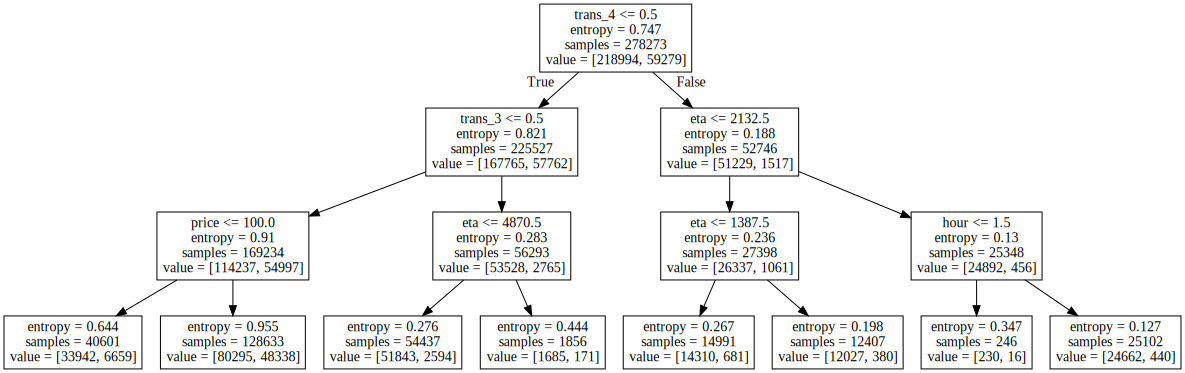

In [40]:
Source(text)

## RANDOM FOREST CON TRAIN Y VALIDATION

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Para entrenar el árbol utilizamos el conjunto de Train
X = train[predictors]
Y = train[target].values.flatten()

In [20]:
forest = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_split = 2, n_jobs=2, oob_score=True, n_estimators=1000)
forest.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [45]:
forest.oob_decision_function_

array([[0.47631579, 0.52368421],
       [0.95543175, 0.04456825],
       [0.70454545, 0.29545455],
       ...,
       [0.98630137, 0.01369863],
       [0.96708861, 0.03291139],
       [0.94778068, 0.05221932]])

In [46]:
forest.oob_score_

0.8413356667732766

In [21]:
y_preds = forest.predict(test[predictors]) #Predicciones en tabla validación

In [22]:
y_true = test[target].values.flatten() #Verdaderos valores Tabla validación

In [23]:
import sklearn.metrics

In [50]:
sklearn.metrics.accuracy_score(y_true, y_preds, normalize=True, sample_weight=None)

0.8409750518264351

In [24]:
pd.crosstab(y_true, y_preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,0,1
Actual,,
0,51348,3235
1,7893,7015


In [26]:
import sklearn.metrics

In [27]:
roc_auc_score(y_true, y_preds)

NameError: name 'roc_auc_score' is not defined

## Ver importancia variables

In [51]:
list(forest.feature_importances_)

[0.05639399576081329,
 0.09124330583102358,
 0.09082643389751846,
 0.11496026426338812,
 0.06668455123517208,
 0.12136409510717802,
 0.11532863766896477,
 0.0023992286825483874,
 0.10952368963239338,
 0.03949693247478206,
 0.0075464210134017435,
 0.006232521252767076,
 0.008830339642972081,
 0.05537152239237254,
 0.028480091771073995,
 0.04178294050554525,
 0.0108889377191714,
 0.011499327714224057,
 0.010265224213954973,
 0.0005376792743642082,
 0.006567536310965799,
 0.0027739620682827155,
 0.0010023615671217881]

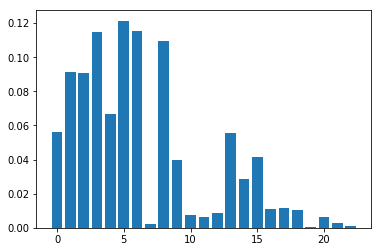

In [52]:
from matplotlib import pyplot
pyplot.bar(range(len(forest.feature_importances_)), forest.feature_importances_)
pyplot.show()

In [53]:
predictors

['hour',
 'termicSensation_origin',
 'termicSensation_destination',
 'distance',
 'price',
 'eta',
 'min_distance',
 'min_price',
 'min_eta',
 'weekday_number',
 'hora_punta',
 'llovizna',
 'trans_1',
 'trans_2',
 'trans_3',
 'trans_4',
 'trans_5',
 'trans_6',
 'trans_7',
 'trans_8',
 'trans_9',
 'trans_10',
 'trans_11']

### GUARDAR EL MODELO 

In [5]:
from joblib import dump, load

In [171]:
dump(forest, 'forest_dummies.pkl') #Guardar archivo #0.83977 (val)

['forest_dummies.pkl']

In [7]:
archivo = './forest_dummies.pkl'
model = load(archivo) 

## TABLA DEFINITIVA CON LAS PREDICCIONES

## Ver comportamiento sobre tabla de train

In [54]:
data_y_preds = forest.predict(data[predictors])

In [73]:
df_preds = pd.DataFrame(data_y_preds,columns=['Y_pred'])

In [74]:
df_preds.head()

,Y_pred
0,1
1,0
2,1
3,0
4,0


In [75]:
data[target].head()

,binaryTarget
0,1
1,0
2,1
3,0
4,0


In [76]:
tabla = data.merge(df_preds,left_index=True, right_index=True)

In [77]:
tabla.head()

,sid,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,...,trans_4,trans_5,trans_6,trans_7,trans_8,trans_9,trans_10,trans_11,is_train,Y_pred
0,1000014,17,49.65,49.65,2,5736,300,1875,5736,0,...,0,0,0,0,0,0,0,0,True,1
1,1000014,17,49.65,49.65,6,6158,0,1857,5736,0,...,0,0,1,0,0,0,0,0,True,0
2,1000063,15,58.75,58.92,1,6644,200,2988,6404,0,...,0,0,0,0,0,0,0,0,True,1
3,1000063,15,58.75,58.92,3,6663,0,1362,6404,0,...,0,0,0,0,0,0,0,0,True,0
4,1000068,12,53.62,53.54,1,9842,200,3037,6614,0,...,0,0,0,0,0,0,0,0,False,0


In [85]:
pd.crosstab(tabla[target].values.flatten(), tabla['Y_pred'], rownames=["Actual"], colnames=["Predictions"])

Predictions,0,1
Actual,,
0,224266,49817
1,54327,19805


## ! Los aciertos se deben a los 0, pocos aciertos en los 1

In [86]:
sklearn.metrics.accuracy_score(tabla[target].values.flatten(), tabla['Y_pred'], normalize=True, sample_weight=None)

0.7009204083683931

## HACER LA TABLA DE TEST PARA ENVIAR

In [87]:
# Total datos evaluación 
data_eval = pd.read_excel('./Datos_Eval.xlsx')

In [89]:
trans_dummies = pd.get_dummies(data_eval['transport_mode'], prefix='trans')

In [90]:
data_eval = data_eval.merge(trans_dummies,left_index=True, right_index=True)

In [91]:
data_y_preds = forest.predict(data_eval[predictors])

In [92]:
df_preds = pd.DataFrame(data_y_preds,columns=['Y_pred'])

In [93]:
tabla = data_eval.merge(df_preds,left_index=True, right_index=True)

In [94]:
tabla.to_excel("Tabla_predicciones.xlsx") 

In [95]:
tabla.head()

,sid,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,...,trans_3,trans_4,trans_5,trans_6,trans_7,trans_8,trans_9,trans_10,trans_11,Y_pred
0,2664861,19,47.96,47.44,7,127369,2800,15046,125993,0,...,0,0,0,0,1,0,0,0,0,1
1,756833,7,62.47,61.83,1,102346,2300,15642,100860,0,...,0,0,0,0,0,0,0,0,0,0
2,737238,13,78.22,78.05,4,158273,53600,8971,158273,0,...,0,1,0,0,0,0,0,0,0,0
3,737238,13,78.22,78.05,1,175912,3800,23182,158273,0,...,0,0,0,0,0,0,0,0,0,0
4,720980,13,78.57,78.05,3,107840,0,8024,105022,0,...,1,0,0,0,0,0,0,0,0,0
